In [1]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import re

In [2]:
cars=pd.read_csv(r'CarPrice_Assignment.csv')
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# DATA Exploration


In [6]:
# Display all numeric (float and int) variables from the dataset.
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head(10)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
cars_numeric.drop(['car_ID','symboling'],axis=1,inplace=True)
cars_numeric.head()

C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 1440x720 with 0 Axes>

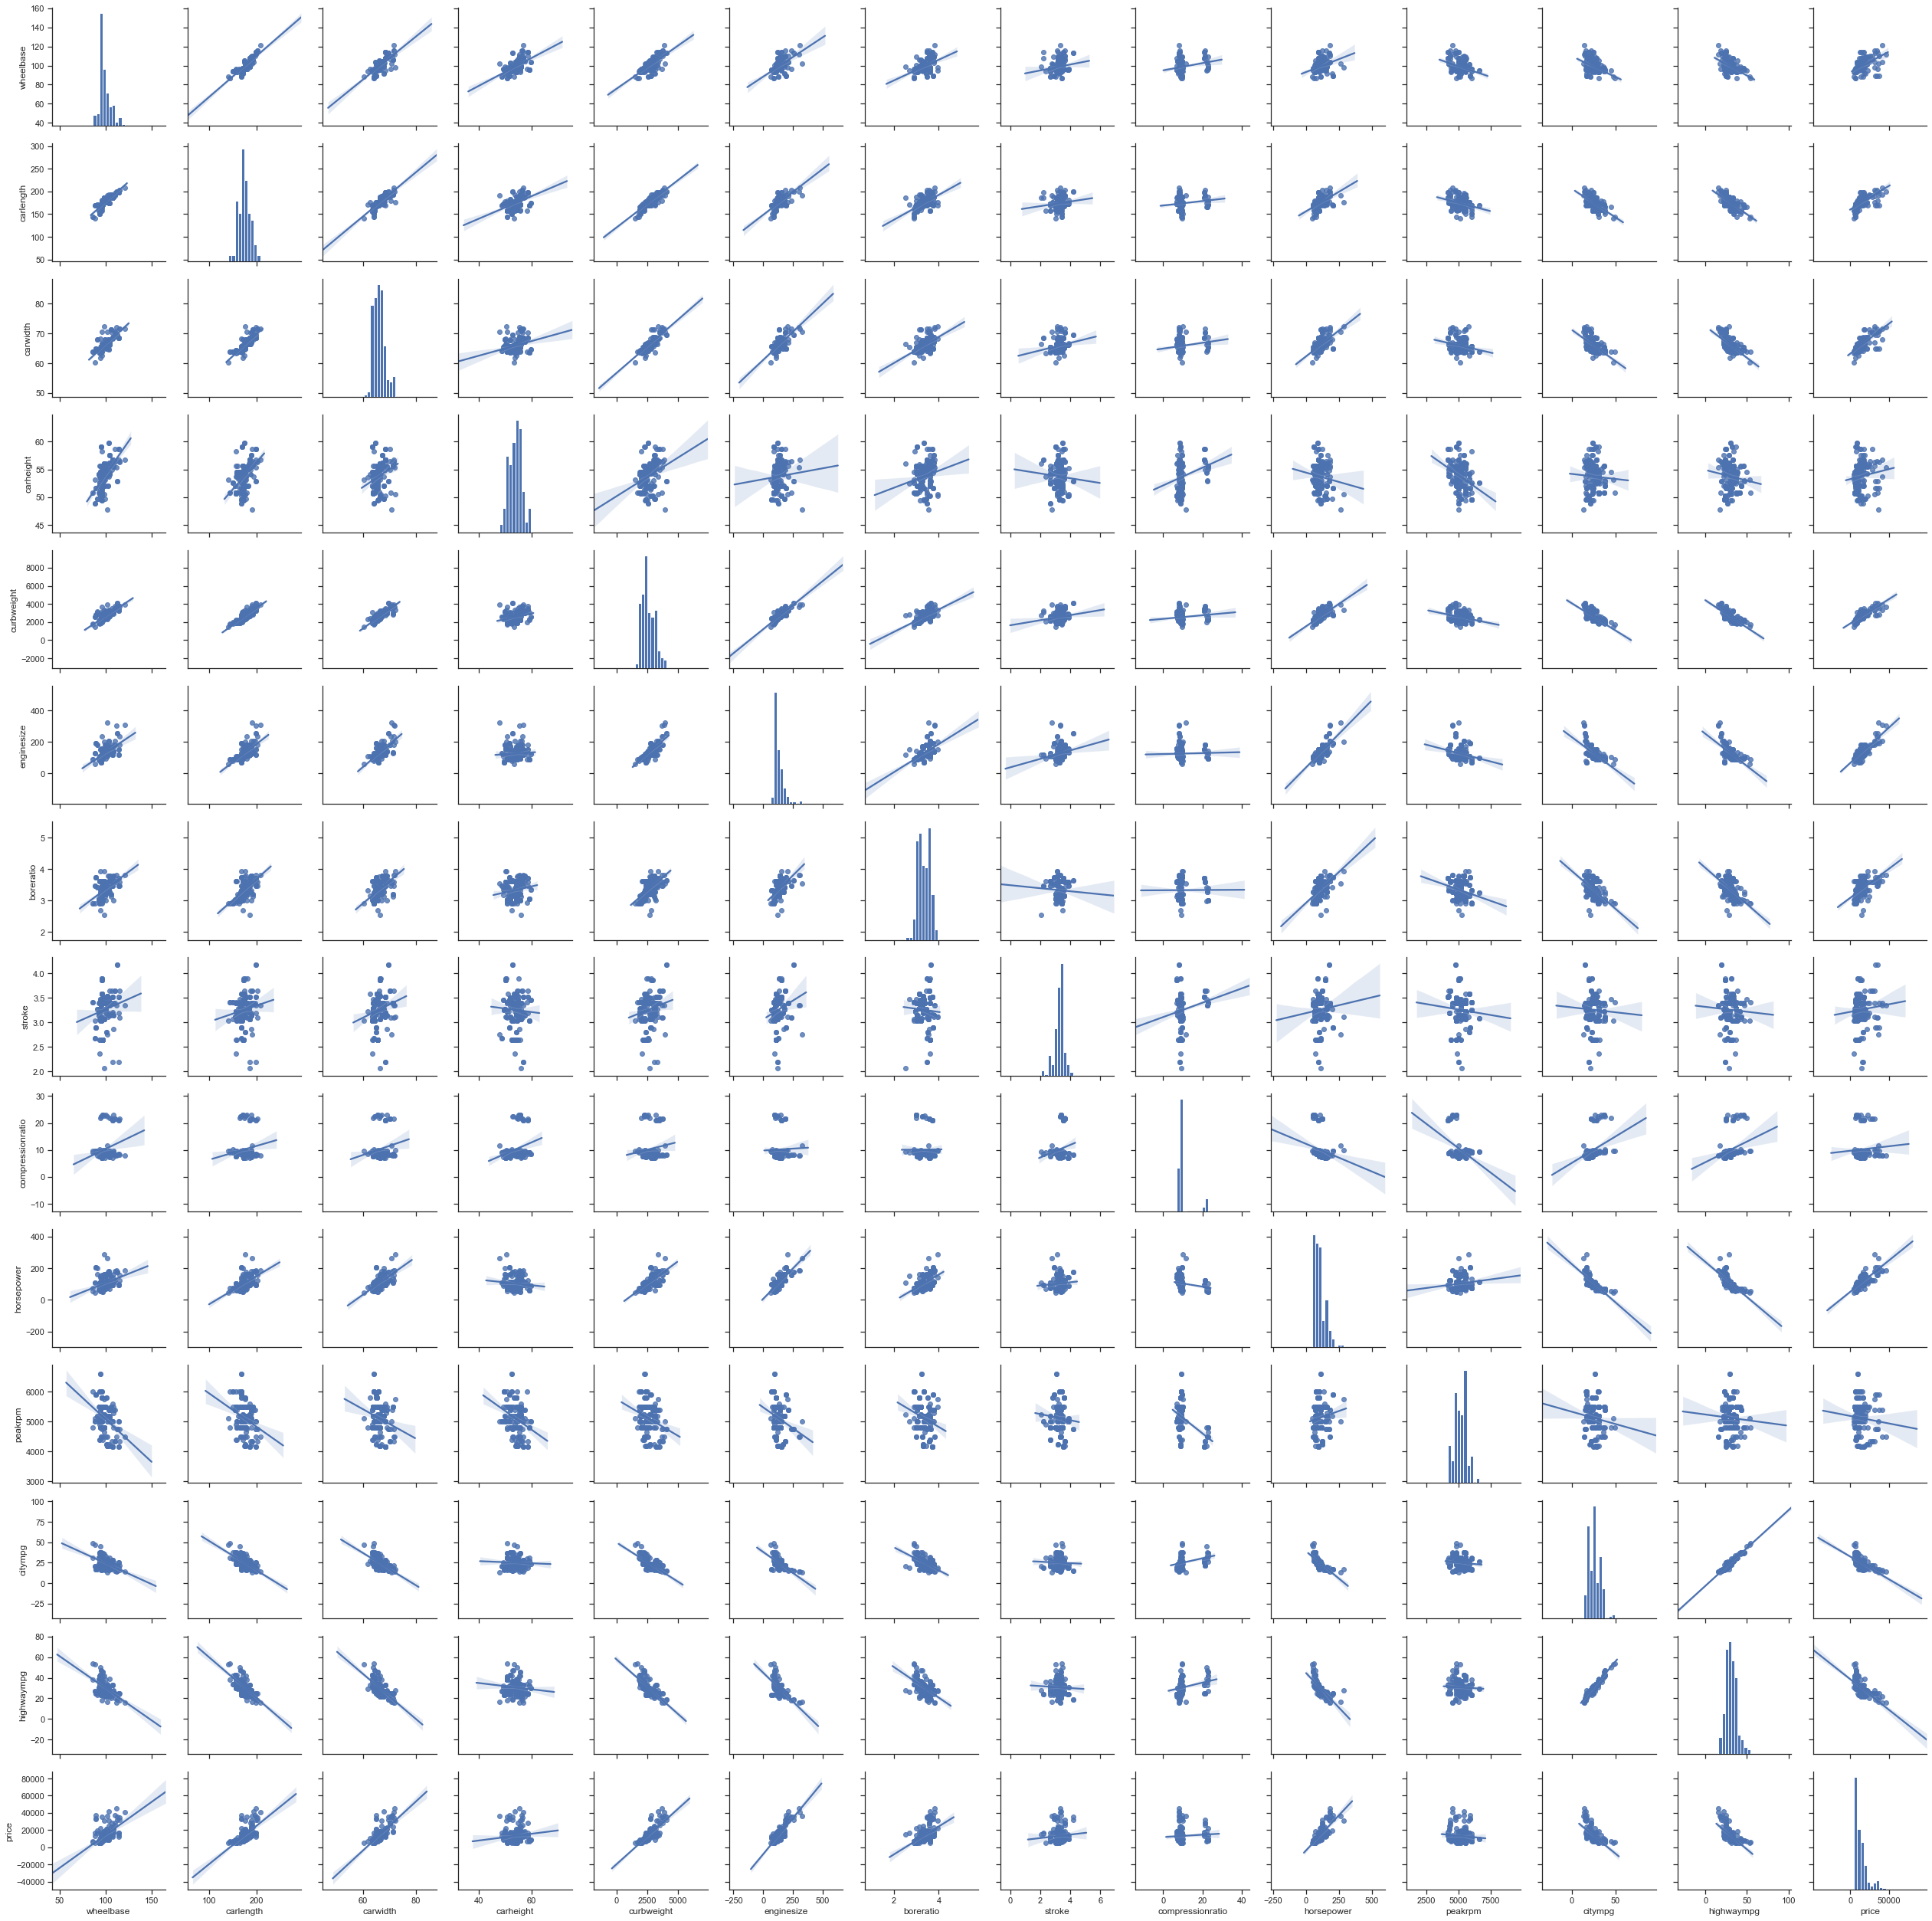

In [9]:

# Make a paiwise scatter plot.
plt.figure(figsize=(20, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(cars_numeric, kind="reg")
plt.show()

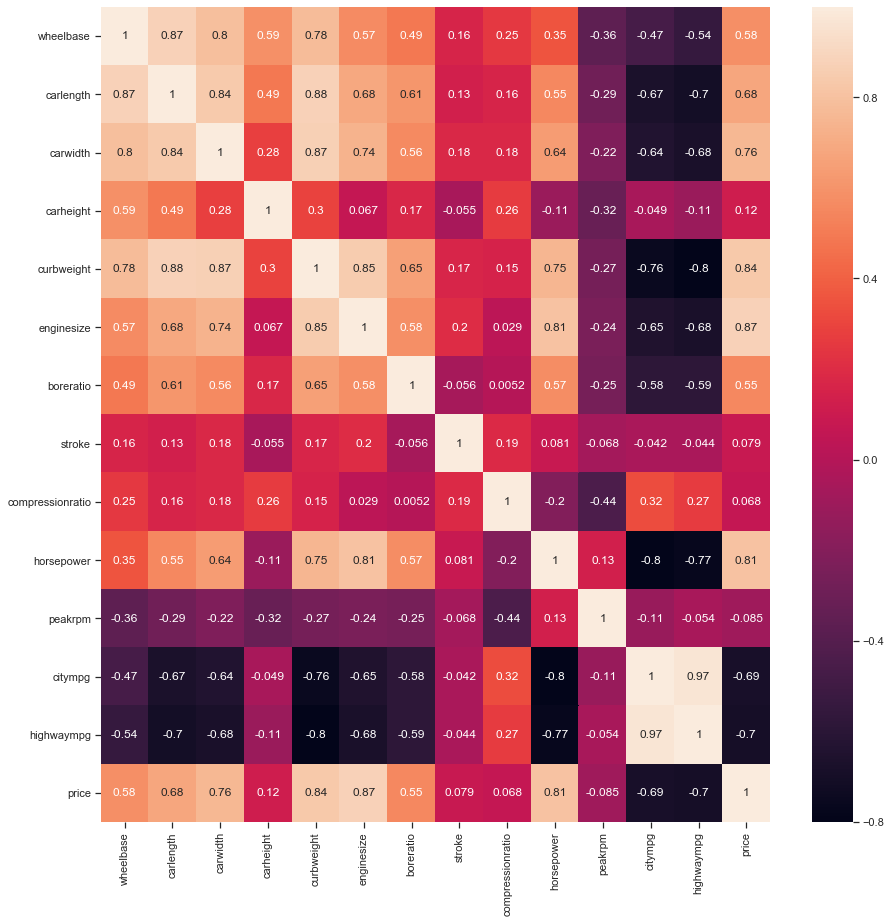

In [10]:
# Plot correlations on a heatmap
plt.figure(figsize=[15, 15])
sns.heatmap(cars_numeric.corr(), annot=True)
plt.show()

In [13]:
# Convert symboling data type from object to categorical.
cars['symboling'] = cars['symboling'].astype('object')

In [14]:
# Print the company name.
cars['CarName']

0                alfa-romero giulia
1               alfa-romero stelvio
2          alfa-romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

In [15]:
cars['CarName']=cars['CarName'].apply(lambda name: name.split()[0])
cars.rename(index=str,columns={'CarName':'Company'},inplace=True)

In [16]:
cars['Company'].astype('category').value_counts()


toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: Company, dtype: int64

In [18]:
cars.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [19]:
cars.Company.replace('maxda','mazda',inplace=True)
cars.Company.replace('Nissan','nissan',inplace=True)
cars.Company.replace('porcshce','porsche',inplace=True)
cars.Company.replace('toyouta','toyota',inplace=True)
cars.Company.replace('vokswagen','volkswagen',inplace=True)
cars.Company.replace('vw','volkswagen',inplace=True)

In [20]:
# Print stats.
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [23]:
# Split a dataset into X and y.
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'Company']]
y = cars['price']

In [24]:
X.select_dtypes(include=['object'])

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
5,2,gas,std,two,sedan,fwd,front,ohc,five,mpfi,audi
6,1,gas,std,four,sedan,fwd,front,ohc,five,mpfi,audi
7,1,gas,std,four,wagon,fwd,front,ohc,five,mpfi,audi
8,1,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,audi
9,0,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi,audi


In [25]:
# Create a dummy for categorical variable columns.
cars_categorical = X.select_dtypes(include=['object'])
print(cars_categorical.shape)
cars_categorical.head(10)

(205, 11)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
5,2,gas,std,two,sedan,fwd,front,ohc,five,mpfi,audi
6,1,gas,std,four,sedan,fwd,front,ohc,five,mpfi,audi
7,1,gas,std,four,wagon,fwd,front,ohc,five,mpfi,audi
8,1,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,audi
9,0,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi,audi


In [26]:
# Convert categorical variable into dummy/indicator variables.
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
print(cars_dummies.shape)
cars_dummies.head(10)

(205, 55)


,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Drop categorical variables from X.
X = X.drop(list(cars_categorical.columns), axis=1)

KeyError: "['symboling' 'fueltype' 'aspiration' 'doornumber' 'carbody' 'drivewheel'\n 'enginelocation' 'enginetype' 'cylindernumber' 'fuelsystem' 'Company'] not found in axis"

In [29]:
# Concatenate dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [30]:
# Scale the features. Standardize a dataset.
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [31]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [32]:
# Specify the list of alpha hyperparameters.
alphas = 10**np.linspace(10,-2,100)*0.5
params = {'alpha': alphas}

# Ridge Regression
ridge = Ridge()

# Set up GridSearchCV() function with the range of hyperparameters.
# Create a KFold object with 10 splits.
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.6s finished
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [33]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
62,0.002600,0.000800,0.001100,0.000300,152.693,{'alpha': 152.69277544167062},-1348.896204,-2251.387195,-2176.819391,-2313.194456,...,-1549.345672,-1580.139422,-1587.063220,-1621.871734,-1605.849732,-1538.423900,-1567.898334,-1566.074334,-1580.908658,29.091549
63,0.002601,0.000663,0.001001,0.000633,115.506,{'alpha': 115.50648500415791},-1350.874671,-2113.821195,-2189.361329,-2177.093589,...,-1464.586455,-1506.757662,-1499.271016,-1535.036495,-1519.073025,-1458.209629,-1488.681332,-1486.781243,-1498.890891,27.635621
64,0.002599,0.000662,0.000999,0.000002,87.3764,{'alpha': 87.37642000038414},-1345.705885,-1974.949939,-2207.511362,-2051.180116,...,-1393.249466,-1441.001104,-1424.984290,-1459.521120,-1436.266583,-1392.781755,-1420.102532,-1417.740002,-1427.783535,25.158265
65,0.005003,0.001677,0.001797,0.000600,66.0971,{'alpha': 66.09705742330144},-1335.029676,-1837.577648,-2214.309021,-1947.221654,...,-1333.725885,-1376.474745,-1361.340807,-1387.682202,-1362.097094,-1332.839510,-1361.528232,-1351.428751,-1362.870705,21.573776
66,0.003297,0.001257,0.001305,0.000467,50,{'alpha': 50.0},-1333.982507,-1729.843331,-2206.657953,-1852.483590,...,-1278.319107,-1315.961890,-1300.039151,-1322.924927,-1299.409226,-1282.961889,-1311.184710,-1286.253392,-1303.682086,17.968936
67,0.007103,0.006125,0.002697,0.001789,37.8232,{'alpha': 37.823166377731454},-1333.325792,-1636.719896,-2182.967981,-1765.954301,...,-1229.217564,-1257.538782,-1243.010098,-1264.982641,-1243.650900,-1241.103945,-1267.772566,-1228.830204,-1251.053991,16.533730
68,0.005000,0.001843,0.002201,0.001077,28.6118,{'alpha': 28.611838296751102},-1330.313879,-1584.097386,-2143.422598,-1687.432163,...,-1190.189350,-1207.610097,-1195.190285,-1213.458879,-1194.710848,-1201.648406,-1228.893795,-1177.803936,-1204.746042,16.516951
69,0.003500,0.001204,0.001602,0.000668,21.6438,{'alpha': 21.643806405415308},-1326.626085,-1540.455204,-2089.846309,-1617.193500,...,-1157.561657,-1160.716160,-1152.330617,-1167.096588,-1150.835865,-1163.357655,-1191.585010,-1129.246828,-1161.973692,17.267868
70,0.002600,0.000915,0.001399,0.000491,16.3727,{'alpha': 16.372745814388658},-1323.422101,-1518.914330,-2025.234087,-1555.633511,...,-1131.133919,-1119.211716,-1112.401244,-1124.181655,-1113.467154,-1127.882824,-1158.726092,-1085.438765,-1124.121145,19.320633
71,0.002500,0.000500,0.001200,0.000400,12.3854,{'alpha': 12.38538177995857},-1321.302638,-1540.707435,-1953.100802,-1502.985565,...,-1107.122109,-1085.686551,-1081.986459,-1086.492156,-1084.488106,-1097.962021,-1132.210902,-1048.014845,-1092.321099,21.571827


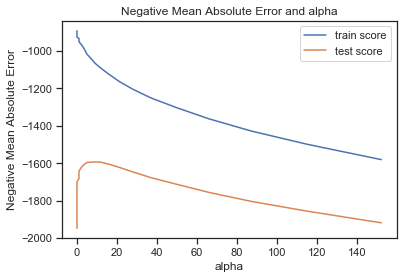

In [34]:
# Plot mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plot train and test scores.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [35]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.94283834e+02, -8.68178292e+01,  1.13770470e+03, -2.05255645e+02,
        1.10416760e+03,  1.49986818e+03, -2.40077828e+02, -2.49000668e+02,
       -6.37410897e+01,  8.35582453e+02,  1.31766419e+02, -3.15388540e+02,
       -1.20970849e+02,  5.40937525e+01,  2.95855373e+02,  1.07169496e+02,
        1.47511971e+02,  1.75450079e+02, -8.78880774e+01,  5.14035178e+02,
       -8.32417879e+01, -4.86037872e+02, -5.91244481e+02, -4.81371587e+02,
       -5.39237171e+02, -2.16586427e+02,  4.64571247e+02,  1.11813404e+03,
        0.00000000e+00, -3.20465647e+02,  2.04195480e+02,  7.44006302e+01,
       -3.15853624e+02,  1.25395594e+02, -6.96202437e+02, -6.71331854e+02,
       -1.12267209e+02, -1.54191170e-28, -1.08387375e+02,  1.25395594e+02,
        1.60486593e+02, -1.00630662e+02,  8.78880774e+01, -7.13134818e+01,
        1.63400433e+02, -1.60607255e+02,  7.89610085e+01,  2.09693472e+02,
        1.03835912e+03,  1.50582709e+03, -1.17518768e+02, -3.86293939e+02,
       -1.24833276e+02, -

In [36]:
y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print(ridge)
print("r^2 on test data : %f" % r2_score_ridge)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
r^2 on test data : 0.886935


In [37]:
# Specify the list of alpha hyperparameters.
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Lasso Regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

# Hide warnings if needed.
import warnings
warnings.filterwarnings('ignore')

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81472623.33648552, tolerance: 849638.1723619108
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79594591.28232515, tolerance: 827773.4012611608
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88648371.3176118, tolerance: 781149.6028018343
  positive)
C:\Users\Suraj.Negi\AppData\Local\Cont

C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74430854.895939, tolerance: 849638.1723619108
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76904401.39619483, tolerance: 827773.4012611608
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83851077.57224381, tolerance: 781149.6028018343
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: 

C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64200693.66700359, tolerance: 781149.6028018343
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5527257.976015449, tolerance: 736365.0404395983
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60126922.838672236, tolerance: 800026.1103221704
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:47

C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14091106.995703965, tolerance: 755743.4164581255
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42718397.494527124, tolerance: 814111.6361696835
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29038590.212636575, tolerance: 817218.9849822046
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:

C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32083300.911583677, tolerance: 800026.1103221704
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19398088.71636179, tolerance: 857629.4152040682
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9804656.54593201, tolerance: 755743.4164581255
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475

C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2809793.4202769697, tolerance: 827773.4012611608
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2745752.8529938757, tolerance: 781149.6028018343
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2706684.887064427, tolerance: 800026.1103221704
  positive)
C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:4

In [38]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011597,0.006637,0.001004,0.000451,0.0001,{'alpha': 0.0001},-1670.179423,-2233.292891,-1683.787910,-2417.184900,...,-918.392340,-858.339134,-878.448931,-857.125625,-898.114825,-886.419434,-952.294831,-890.728324,-893.247859,28.314647
1,0.010499,0.001859,0.001406,0.001293,0.001,{'alpha': 0.001},-1670.147506,-2233.099024,-1682.161606,-2417.284483,...,-918.395845,-858.339372,-878.447925,-857.127057,-898.114375,-886.420996,-952.300647,-890.724478,-893.250063,28.315664
2,0.009098,0.000830,0.001102,0.000300,0.01,{'alpha': 0.01},-1669.824345,-2231.166378,-1678.941981,-2418.280334,...,-918.431581,-858.341752,-878.437862,-857.141387,-898.112139,-886.438762,-952.358904,-890.686063,-893.272878,28.326003
3,0.010910,0.002388,0.001195,0.000408,0.05,{'alpha': 0.05},-1668.413884,-2222.701229,-1678.056645,-2422.702063,...,-918.707336,-858.371794,-878.410401,-857.227403,-898.101635,-886.538610,-952.658204,-890.518602,-893.398686,28.386191
4,0.008904,0.001223,0.000996,0.000449,0.1,{'alpha': 0.1},-1666.662236,-2212.313213,-1676.261034,-2428.181314,...,-919.105832,-858.407294,-878.380986,-857.342859,-898.091802,-886.647287,-953.068574,-890.330074,-893.568787,28.477486
5,0.009209,0.001403,0.000901,0.000300,0.2,{'alpha': 0.2},-1663.500740,-2191.917204,-1674.289397,-2438.794708,...,-919.918397,-858.551061,-878.271461,-857.579410,-898.108753,-886.868703,-953.822377,-889.942390,-893.921717,28.641287
6,0.009190,0.001079,0.000858,0.000546,0.3,{'alpha': 0.3},-1660.158970,-2172.019571,-1673.208478,-2449.401226,...,-920.671331,-858.697003,-878.312187,-857.824343,-898.238355,-887.118059,-954.683638,-889.706862,-894.344449,28.802848
7,0.009599,0.002246,0.001201,0.000401,0.4,{'alpha': 0.4},-1656.797582,-2152.720222,-1672.049154,-2460.024900,...,-921.434786,-858.843202,-878.658146,-858.042209,-898.449781,-887.356938,-955.518769,-889.490100,-894.800199,28.954806
8,0.009499,0.001360,0.000902,0.000301,0.5,{'alpha': 0.5},-1653.382618,-2134.373905,-1670.947625,-2469.299889,...,-922.200100,-859.160430,-879.353438,-858.414009,-898.736030,-887.594409,-956.311960,-889.301342,-895.326679,29.044909
9,0.009099,0.001044,0.001101,0.000301,0.6,{'alpha': 0.6},-1650.020067,-2117.536127,-1669.752042,-2477.788801,...,-922.966442,-859.411464,-880.145219,-858.861764,-899.156246,-887.854621,-956.966968,-889.183479,-895.868110,29.105927


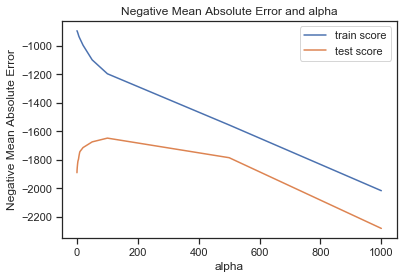

In [39]:
# Plot mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# # Plot train and test scores.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [40]:
alpha =100
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  1.35162507e+03, -0.00000000e+00,
        1.56960832e+03,  1.28251489e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  9.41297049e+02,  1.05727912e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.34643337e+01, -0.00000000e+00,  1.90422275e+02,
       -0.00000000e+00, -2.79431758e+02, -1.31611913e+02,  0.00000000e+00,
       -2.56790041e+02, -0.00000000e+00,  5.17031613e+02,  1.96108639e+03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.86933604e+01,  2.10469154e+02, -1.39245653e+02, -2.36992743e+02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  6.53317486e-01,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.10467700e+01,
        1.55648565e+02, -7.41817773e+01, -0.00000000e+00,  1.36333855e+02,
        1.40134766e+03,  1.59464168e+03,  0.00000000e+00, -5.13081145e+01,
        0.00000000e+00, -

In [41]:
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.880019


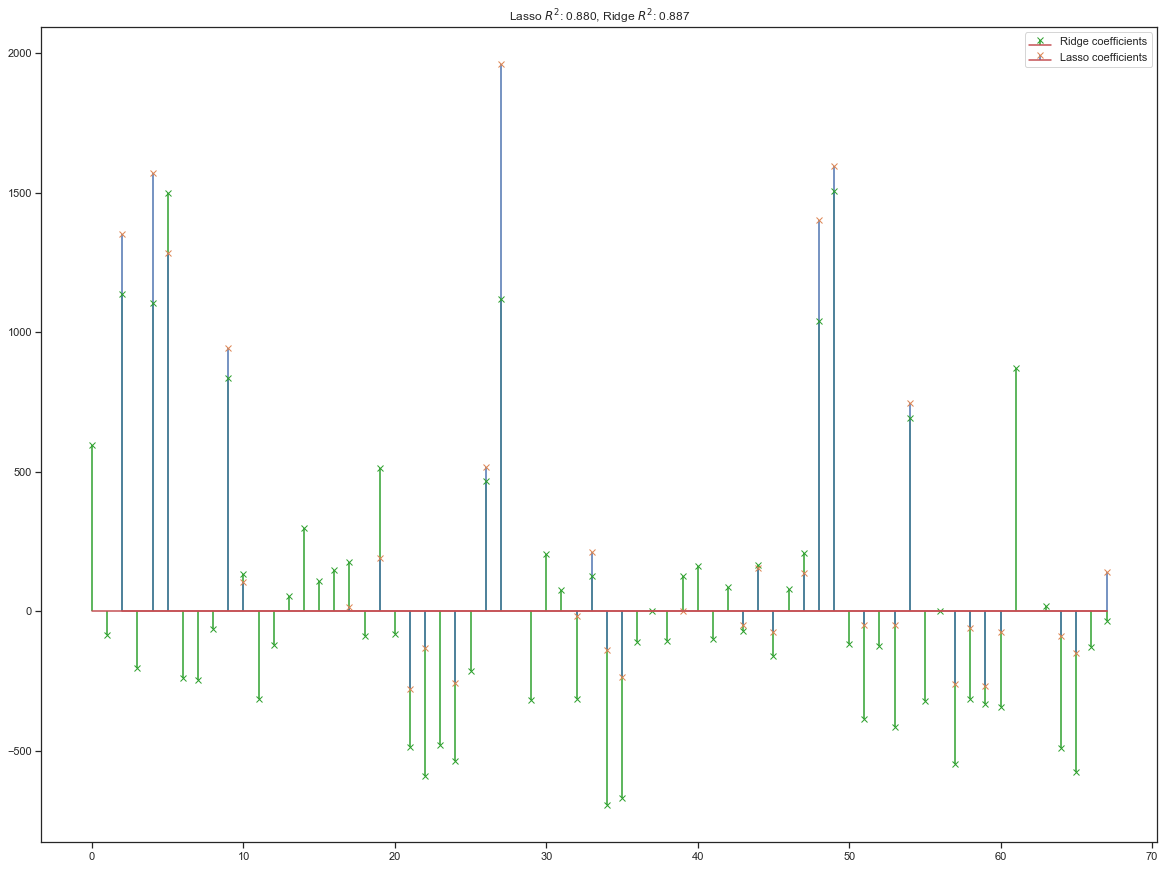

In [43]:
plt.figure(figsize=(20,15))
m, s, _ = plt.stem(np.where(ridge.coef_)[0], ridge.coef_[ridge.coef_ != 0],
                   markerfmt='x', label='Ridge coefficients',
                   use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients',
                   use_line_collection=True)
plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Ridge $R^2$: %.3f"
          % (r2_score_lasso, r2_score_ridge))
plt.show()